## MODEL TRAINING


#### 1. Importing data and required packages

In [2]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### 2. Importing CSV data as Pandas Dataframe

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 3. Spliting the data into independent variable(X) and dependent variable(Y)

In [5]:
X = df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


Identifing different categories of features

In [6]:
print("Categories in 'gender' variable:     ", end =" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:    ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:      ", end =" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:    ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:       ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:     ['none' 'completed']


In [7]:
Y = df['math_score']

Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

#### 4. Perfroming One Hot Encoder and Standard Scaler transformation Simultaneously using Column transformation


In [8]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ss_transfromer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features),
        ("StandardScaler", ss_transfromer, num_features)
    ]
)

In [9]:
X = preprocessor.fit_transform(X)


In [10]:
X.shape

(1000, 19)

#### 5. Spliting the dataset into training and testing set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### 6. Creating a Evaluate Function to return the performance after the model has been trained

In [12]:
def evaluate_model(true_value, predicted_value):
    mae = mean_absolute_error(true_value, predicted_value)
    mse = mean_squared_error(true_value, predicted_value)
    rmse = numpy.sqrt(mse)
    r2_square = r2_score(true_value, predicted_value)

    return mae, rmse, r2_square

#### 7. Training Models to check their perfromance

In [13]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" :  Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

modelList = []
r2List = []

for i in range(len(list(models))):
    #Iterating through all the models mentioned in models dictionry
    model = list(models.values())[i]
    #Fitting the data into model
    model.fit(X_train,Y_train)

    #Making the pridiction on train and test data to record the results

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluating the model

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(Y_test, y_test_pred)

    print(list(models.keys())[i])
    modelList.append(list(models.keys())[i])

    print("Model Performance for Training Set: ")
    print("-Root Mean Squared Error: ", model_train_rmse)
    print("-Mean Absolute Error: ", model_train_mae)
    print("-R2 Score: ", model_train_r2)

    print("Model Performance for Test Set: ")
    print("-Root Mean Squared Error: ", model_test_rmse)
    print("-Mean Absolute Error: ", model_test_mae)
    print("-R2 Score: ", model_test_r2)

    r2List.append(model_test_r2)

    print('_'*60)
    print('\n')



Linear Regression
Model Performance for Training Set: 
-Root Mean Squared Error:  5.290656725207597
-Mean Absolute Error:  4.2129296875
-R2 Score:  0.8788114120759184
Model Performance for Test Set: 
-Root Mean Squared Error:  5.473699545896723
-Mean Absolute Error:  4.4090625
-R2 Score:  0.8655956533297685
____________________________________________________________


Lasso
Model Performance for Training Set: 
-Root Mean Squared Error:  6.50757777805628
-Mean Absolute Error:  5.14000201458171
-R2 Score:  0.8166498405280732
Model Performance for Test Set: 
-Root Mean Squared Error:  6.721202321013505
-Mean Absolute Error:  5.27047464446879
-R2 Score:  0.7973505910814896
____________________________________________________________


Ridge
Model Performance for Training Set: 
-Root Mean Squared Error:  5.289039306381107
-Mean Absolute Error:  4.212003787591529
-R2 Score:  0.8788854984330935
Model Performance for Test Set: 
-Root Mean Squared Error:  5.480786583292139
-Mean Absolute Error

#### 8. Results of the Model

In [14]:
pd.DataFrame(list(zip(modelList, r2List)), columns=["Model Name", "R2 Score"]).sort_values(by="R2 Score", ascending=False)

,Model Name,R2 Score
0,Linear Regression,0.865596
2,Ridge,0.865247
7,CatBoosting Regressor,0.841864
8,AdaBoost Regressor,0.825591
5,Random Forest Regressor,0.824530
1,Lasso,0.797351
6,XGBRegressor,0.789013
3,K-Neighbors Regressor,0.777176
4,Decision Tree,0.707608


#### 9. Creating Linear Regression Model

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print("Accuracy of the Model is: ", score)

Accuracy of the Model is:  86.55956533297685


Text(0, 0.5, 'Predicted')

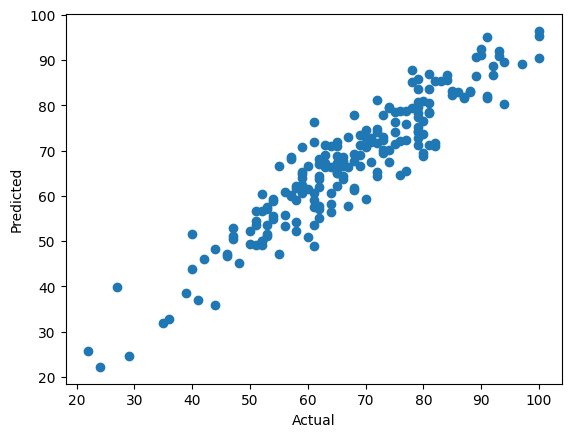

In [16]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

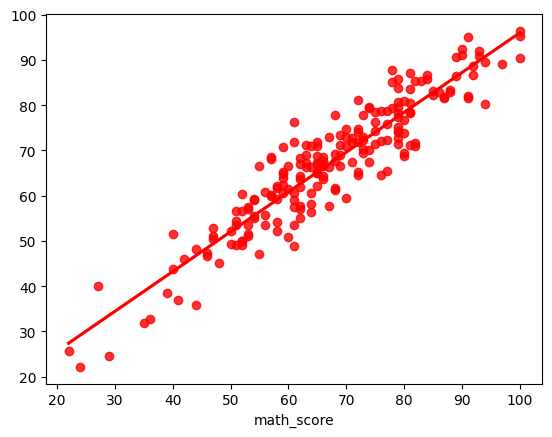

In [17]:
sns.regplot(x=Y_test, y=y_pred,ci=None, color="red")

#### 10. Finding difference between Actual and Predicted Values

In [18]:
pred_diff = pd.DataFrame({"Actual Value": Y_test, "Predicted Value": y_pred, "Difference": Y_test-y_pred})
pred_diff

,Actual Value,Predicted Value,Difference
825,62,67.0625,-5.0625
374,59,64.0000,-5.0000
488,64,60.5625,3.4375
608,61,60.6250,0.3750
42,53,57.0625,-4.0625
...,...,...,...
664,80,69.3750,10.6250
962,100,96.4375,3.5625
144,88,83.0000,5.0000
955,72,71.7500,0.2500
